### Teoría de Circuitos 2

# Trabajo Práctico de Laboratorio 1

* Curso: R4001

* Albano Nicolás 

* Profesor Adjunto: Llamedo Soria, Mariano 

* Jefe de Trabajos Prácticos: Fuoco, Cesar



## 1) Consigna del tp 

La consigna del tp era diseñar y armar un filtro dado por los profesores de la catedra haciendo uso del integrado UAF42, en nuestro caso el filtro a diseñar y armar era el siguiente: 

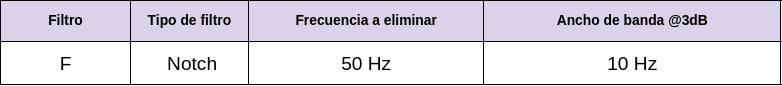

Figura 1. Requerimientos del tplab

Para cumplir con las especificaciones dadas vamos a hacer uso de las dos salidas del UAF42, pasa altos y pasa bajos y sumarlos para lograr nuestro filtro elimina banda.

## 2) Calculo de la transferencia 

Dado a que va a ser un elimina banda compuesto de una suma de un pasa-bajos y un pasa-altos deducimos que el orden del filtro va a ser un orden dos, ya que debe contar con dos ceros sobre el eje jw y sus polos lo mas cerca posible. 

\begin{equation}
T_b(s)=\frac{\omega_0²}{ s² + s * \frac{\omega_0}{Q} + \omega_0²}
\end{equation}

\begin{equation}
T_a(s)=\frac{s²}{ s² + s * \frac{\omega_0}{Q} + \omega_0²}
\end{equation}

\begin{equation}
T_n(s)=\frac{s²+\omega_0²}{ s² + s * \frac{\omega_0}{Q} + \omega_0²}
\end{equation}

De la plantilla sabemos que nuestra $f_0$ = 50 Hz, por ende 
* $\omega_0$ = 2 $\pi$ 50Hz
Y como queremos un ancho de banda de 10 Hz 
* Q = $ \frac{ f_0 } { \Delta_f} $ = $ \frac{50Hz}{10Hz} $ = 5


## 3) Simulación en Python

In [51]:
from pytc2.sistemas_lineales import analyze_sys,pretty_print_lti, tf2sos_analog,pretty_print_SOS
from pytc2.general import print_subtitle,print_latex,a_equal_b_latex_s
from scipy import signal as sig
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys
import math

#### Notch_ord_2_rip_at=50rad/seg

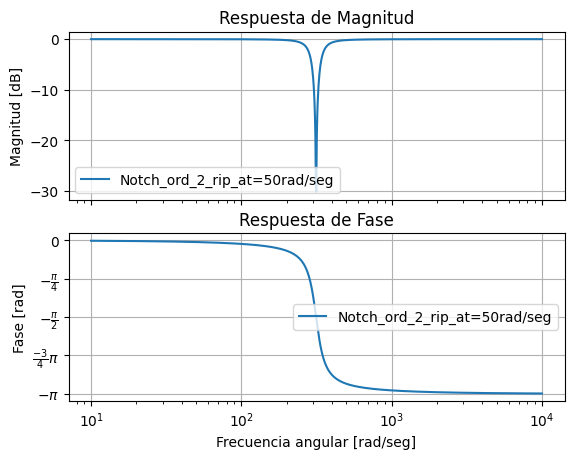

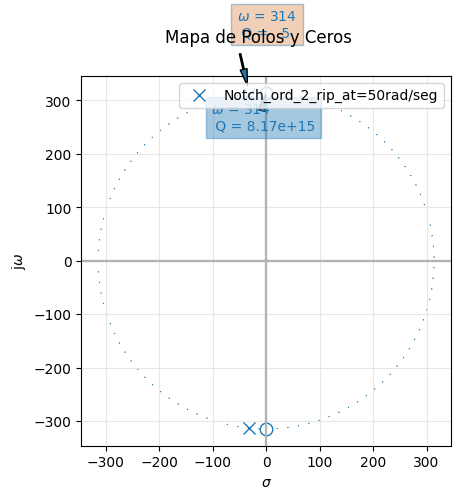

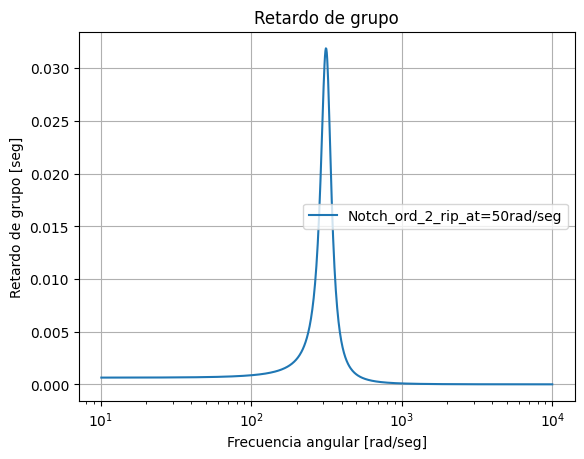

In [52]:
Q=5
norma=2*math.pi*50

num_notch= [1.0 , 0, (norma)**2]
den_notch=[1.0, norma/Q , (norma)**2]

filter_names = []
all_sys=[]

n=2

this_aprox= 'Notch'
this_label=this_aprox + '_ord_' + str(n) + '_rip_' +'at=50rad/seg'


filter_names.append(this_label)
all_sys.append(sig.TransferFunction(num_notch,den_notch))
analyze_sys(all_sys,filter_names)

print_subtitle(this_label)

En la simulacion pudimos ver que efectivamente se elimina la frecuencia deseada con su ancho de banda correspondiente


## 4) Sintesis del circuito 

Como se nombro anteriormente para la realizacion de este laboratorio se implemento el circuito integrado UAF42 el cual cuenta con 4 amplificadores operacionales, uno con una salida de filtro pasa-bajos, otra pasa-banda, un pasa-altos y un operacional para uso libre. Ademas cuenta con capacitores altamente precisos de 1000pF 

* El esquematico del mismo es el siguiente 

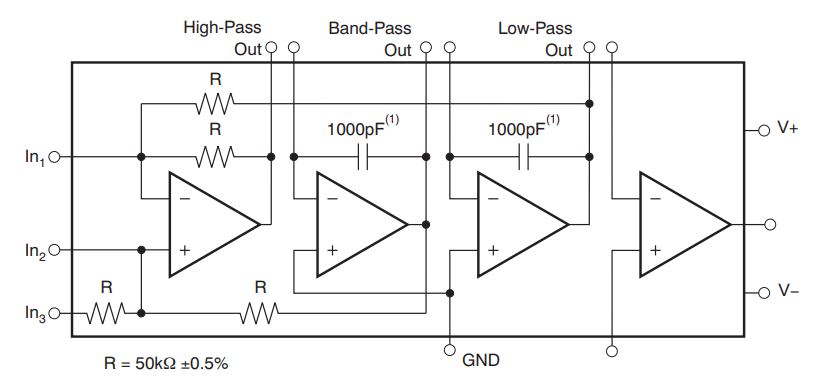
Figura 2. Esquematico del UAF42

El fabricante nos pone a disposicion una forma de conectar el circuito integrado y nos facilita las expresiones de $\omega_0 $ y Q 

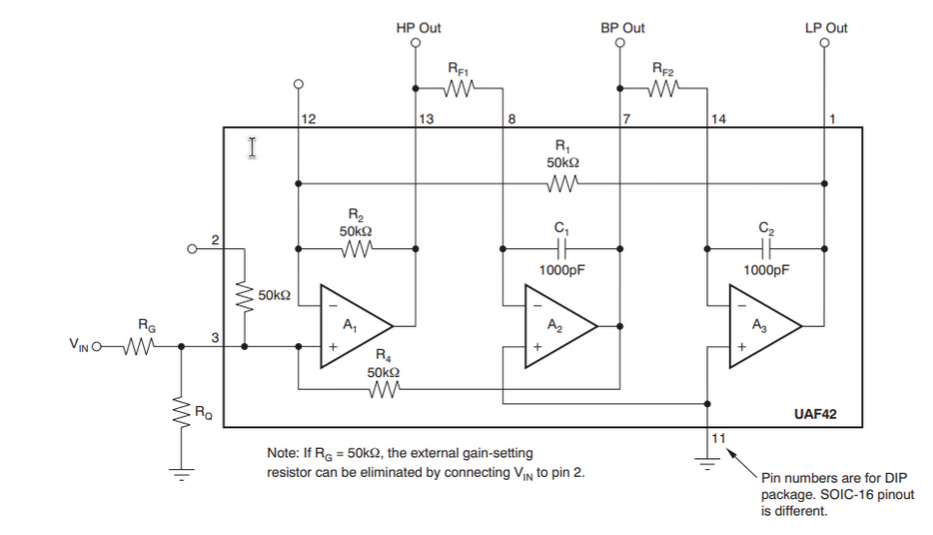

Figura 3. Forma de conexion propuesta por Texas Instrument 

Al conectarlo de esta forma nos queda entonces 

\begin{equation}
\omega^2= \frac{R2}{R_1 R_{F1} R_{F2} C_1 C_2} 
\end{equation}
Hacemos que RF1=RF2 y entonces nos queda = 3.183Meg

\begin{equation}
Q = \frac{1+\frac{R_4*(R_G+R_Q)}{R_G R_Q}}{1 + \frac{R_2}{R1}} * (\frac{R_2 R_{F1} C_1 } {R1 R_{F2} C_"2})^{1/2}
\end{equation}

Con una Rq=9k conseguimos el Q que queriamos

Por ultimo, para sumar las transferencias del pasa-alto y pasabajos agregamos Rz1, Rz2, Rz3 teniendo en cuenta que $ Q = \frac{RZ3}{RZ1} = \frac {RZ3}{RZ2}$ Para mantener la ganancia del filtro unitaria quedando Rz1 y Rz2 = 2k y Rz3=10k

Entonces para nuestras especificaciones nos quedaria el siguiente circuito:

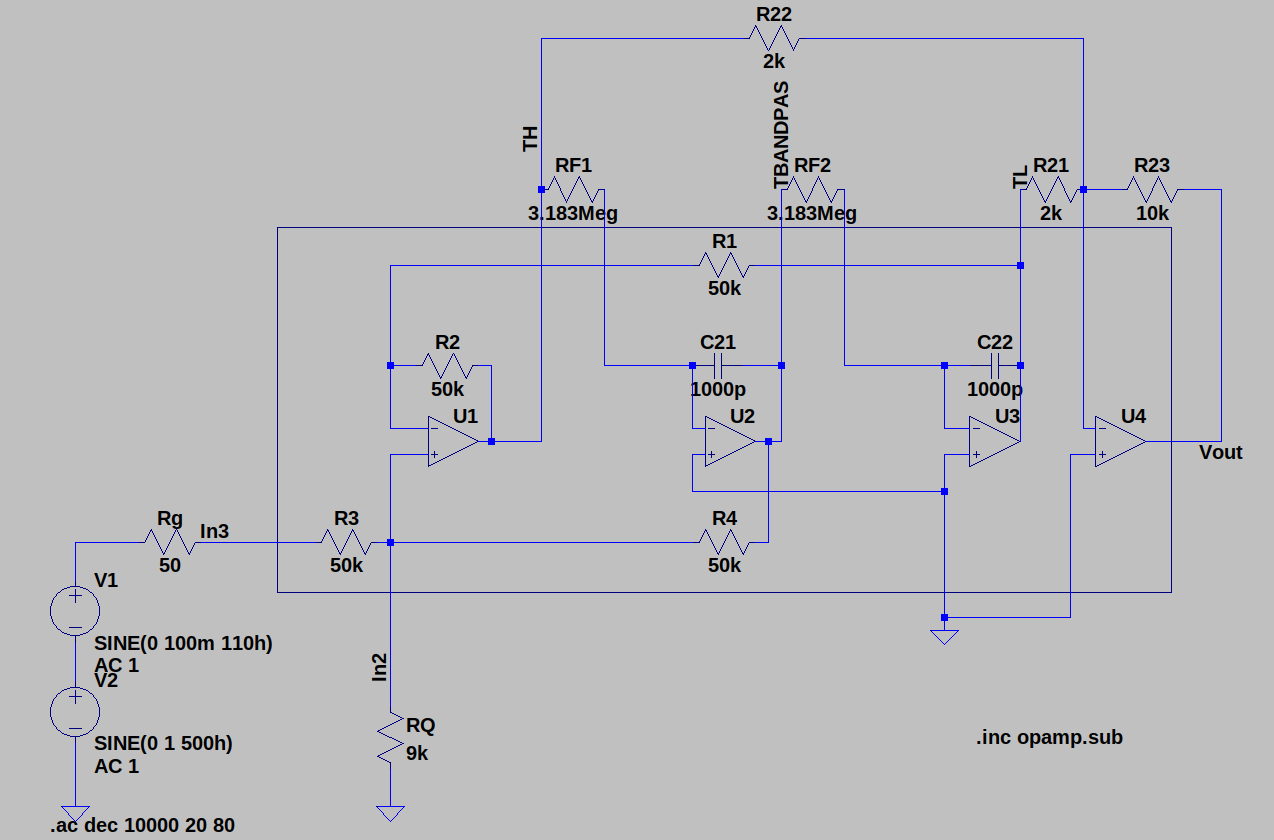

Figura 4. Circuito final de nuestro diseño en LTspice

## Simulacion en LTspice 

* Con OPAMPS IDEALES

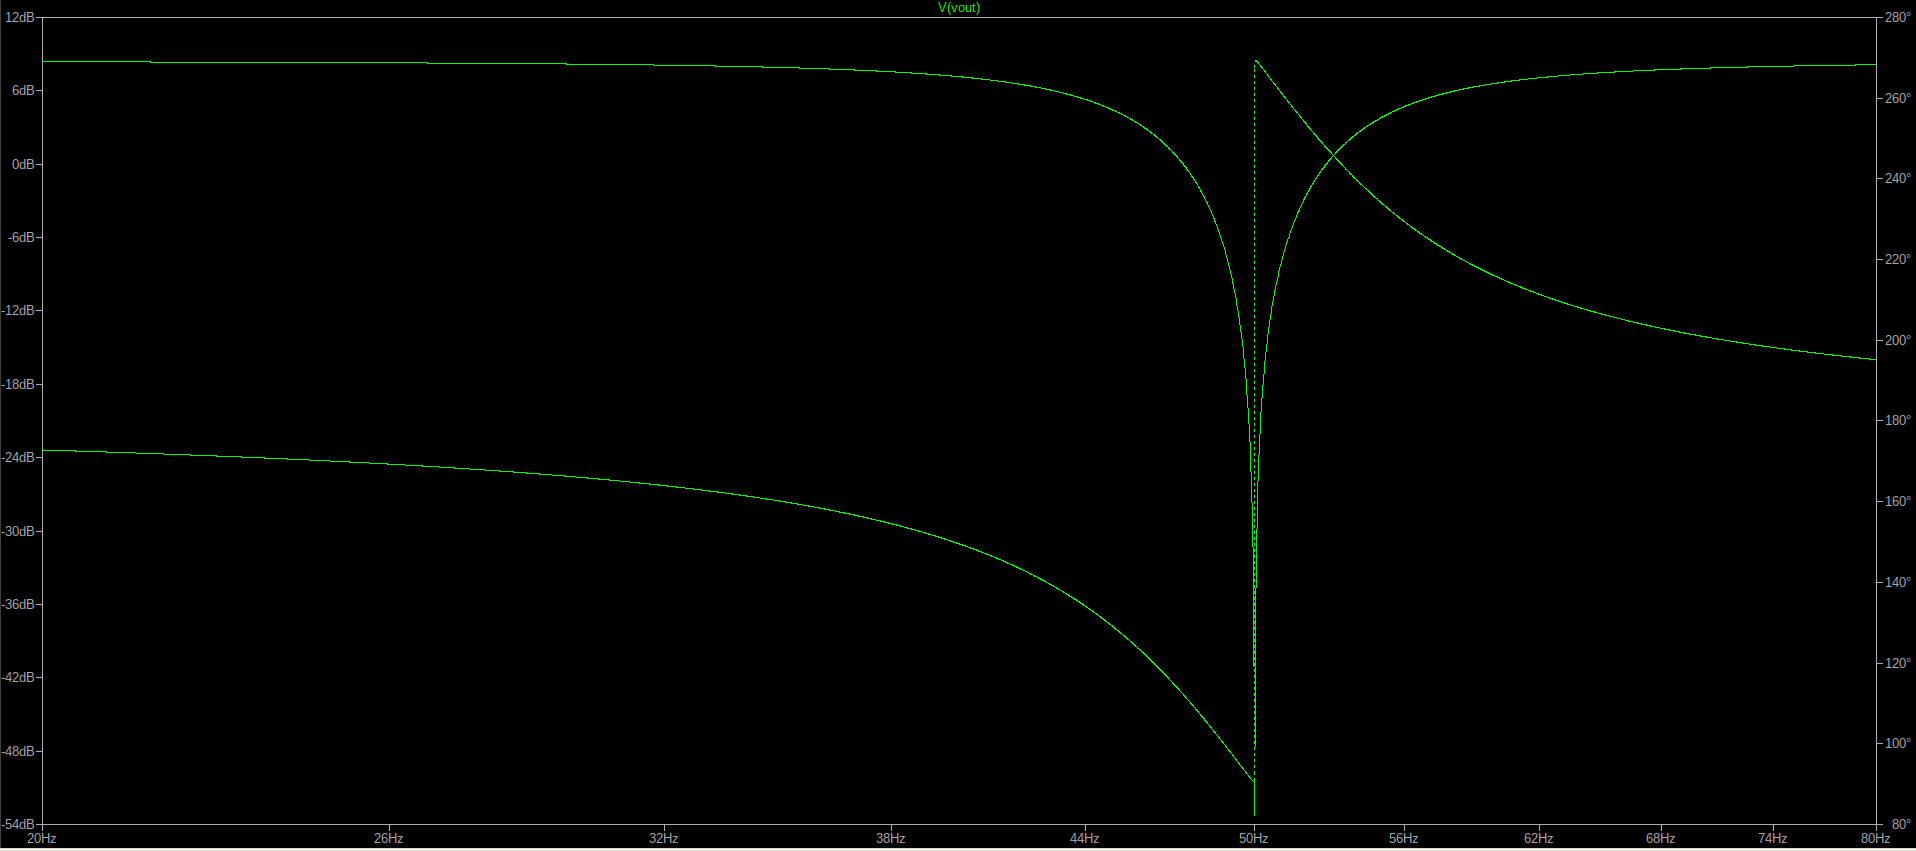

Figura 5. Modulo y fase de nuestro circuito en LTspice

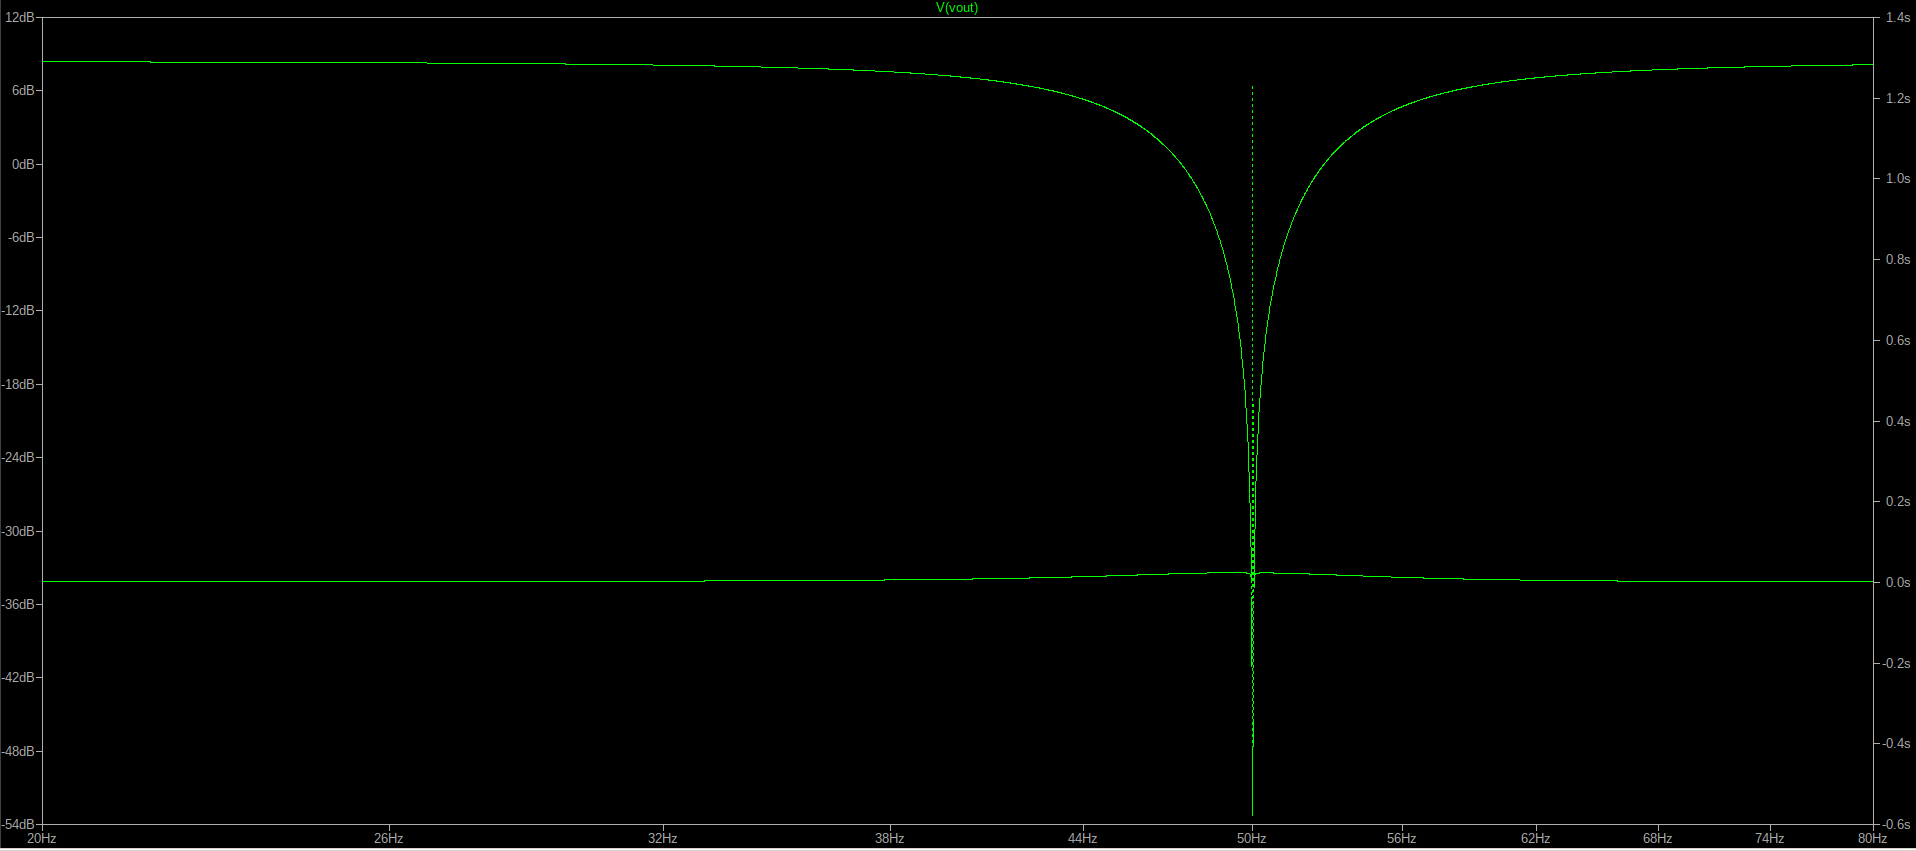

Figura 6. Modulo y Retardo de Grupo

* Con el UAF42 de Texas Instrument 

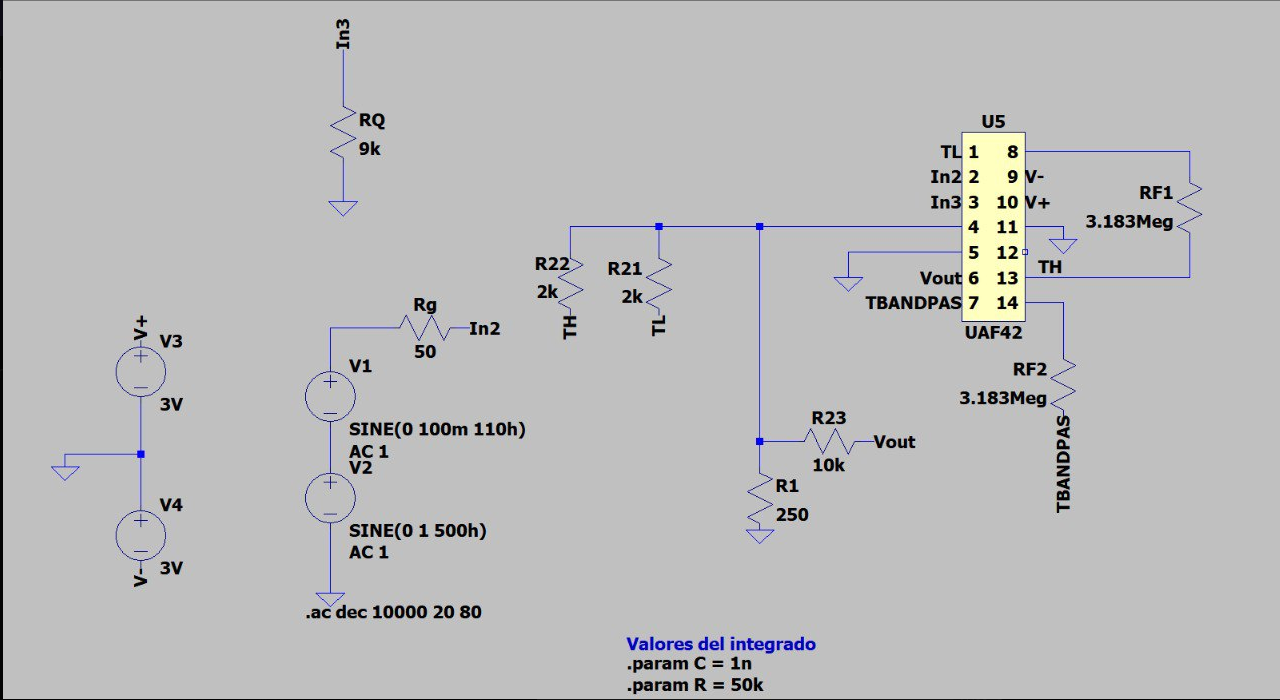

Figura 7. LTspice con el modelo del integrado

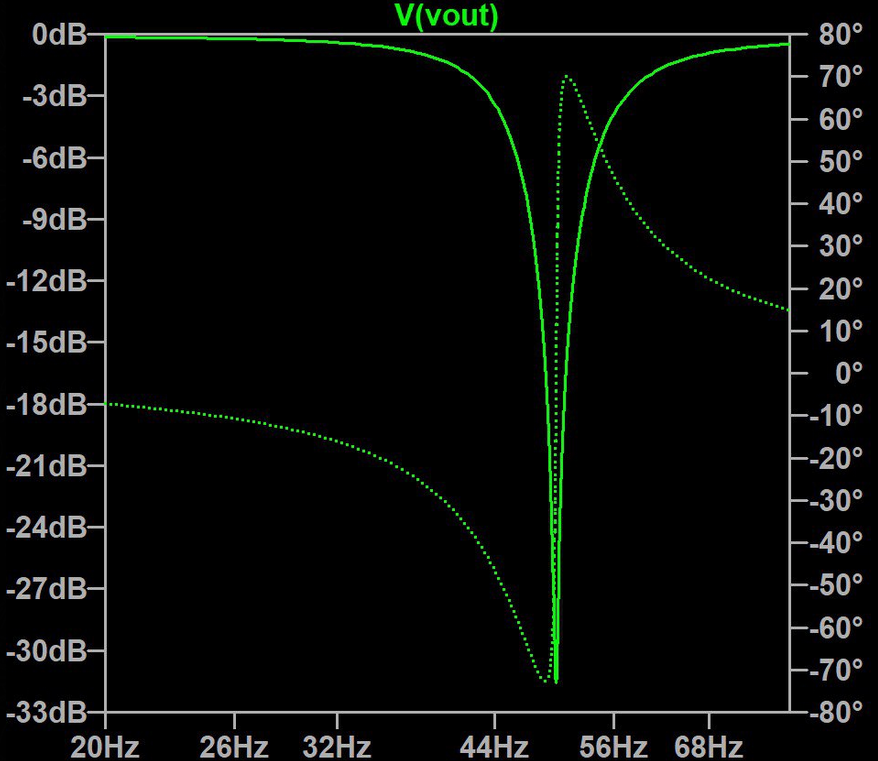

Figura 8. Modulo y fase

## 5) Mediciones

* Con el osciloscopio 
De los datos recolectados con el osciloscopio levantamos los siguientes datos:

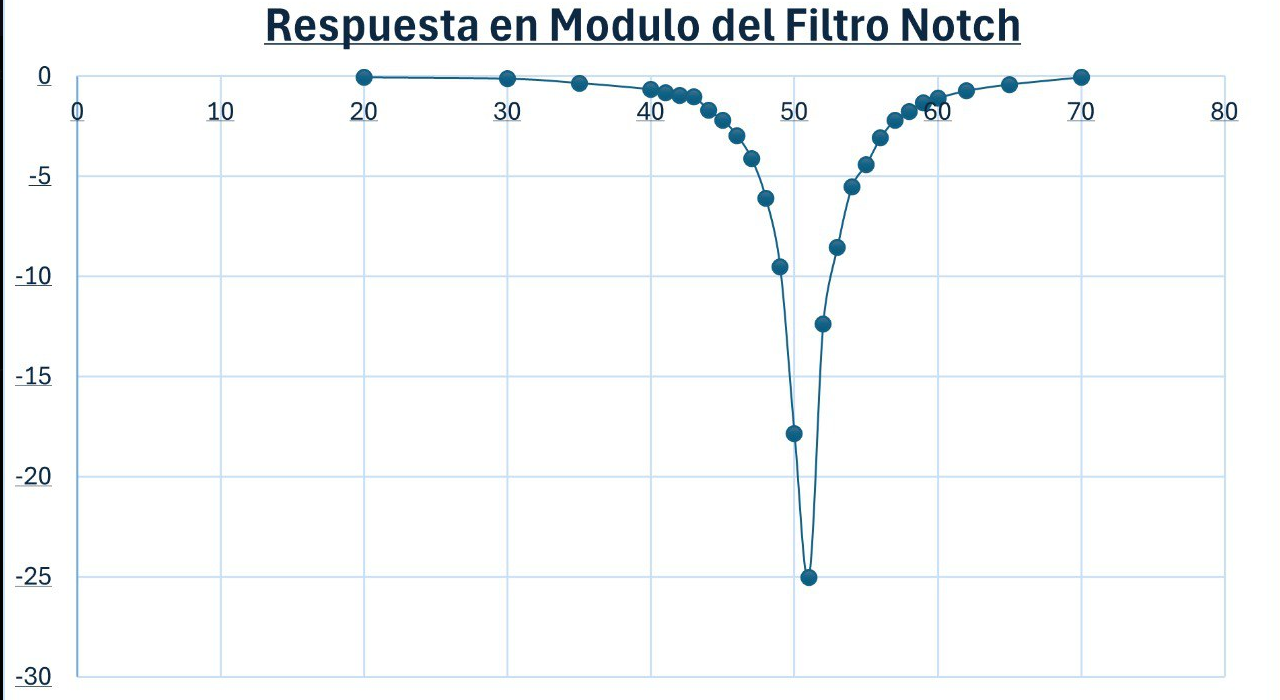

Figura 9. Modulo medido con el osciloscopio 

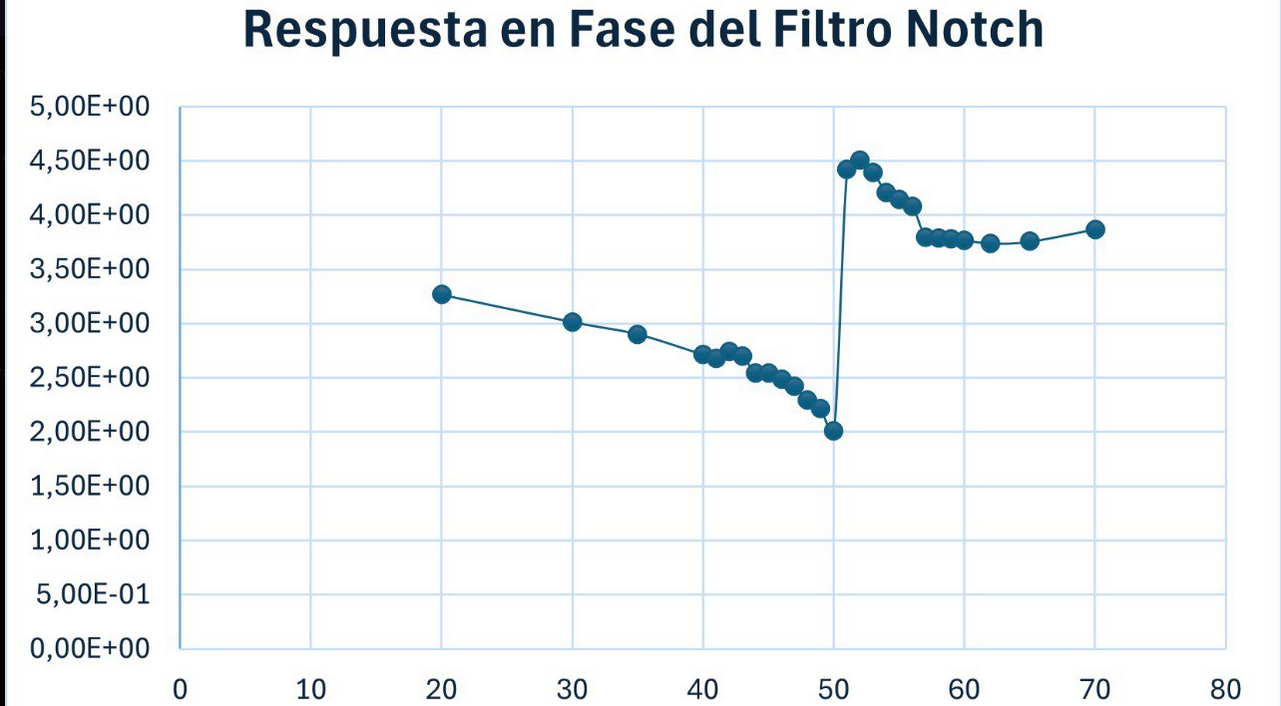

Figura 10. Fase medida con el osciloscopio 

* Con el analizador de audio
 

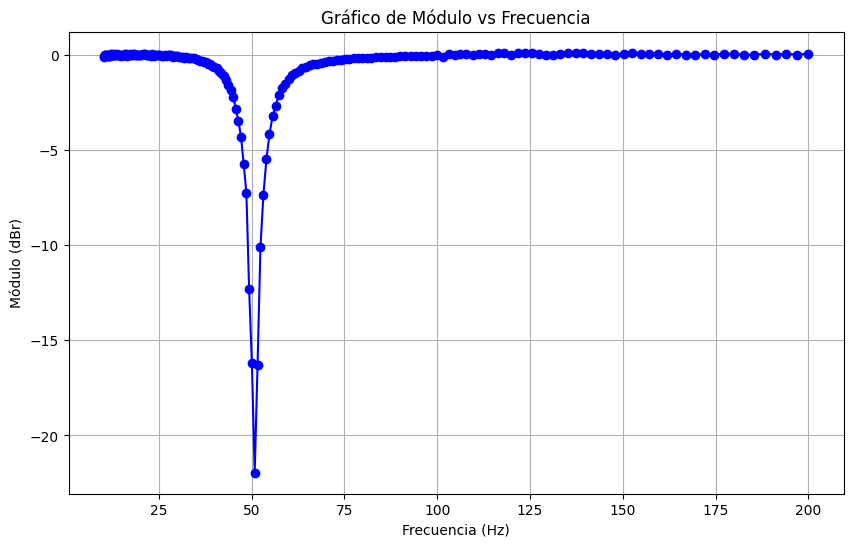

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
file_path = '/home/nicolas/Downloads/MARTINMOD.csv'

# Leer el archivo CSV, omitiendo las primeras 208 filas y considerando que los encabezados están en la fila 207
df = pd.read_csv(file_path, skiprows=207)


# Asegurarse de que los nombres de las columnas son correctos
df.columns = ['X (Hz)', 'Ch-1 (dBr)']

# Convertir las columnas a los tipos de datos correctos si es necesario
df['X (Hz)'] = pd.to_numeric(df['X (Hz)'], errors='coerce')
df['Ch-1 (dBr)'] = pd.to_numeric(df['Ch-1 (dBr)'], errors='coerce')

# Eliminar filas con valores NaN si los hay
df = df.dropna()



# Comprobar si hay datos para graficar
if df.empty:
    print("No hay datos para graficar.")
else:
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df['X (Hz)'], df['Ch-1 (dBr)'], marker='o', linestyle='-', color='b')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Módulo (dBr)')
    plt.title('Gráfico de Módulo vs Frecuencia')
    plt.grid(True)
    plt.show()


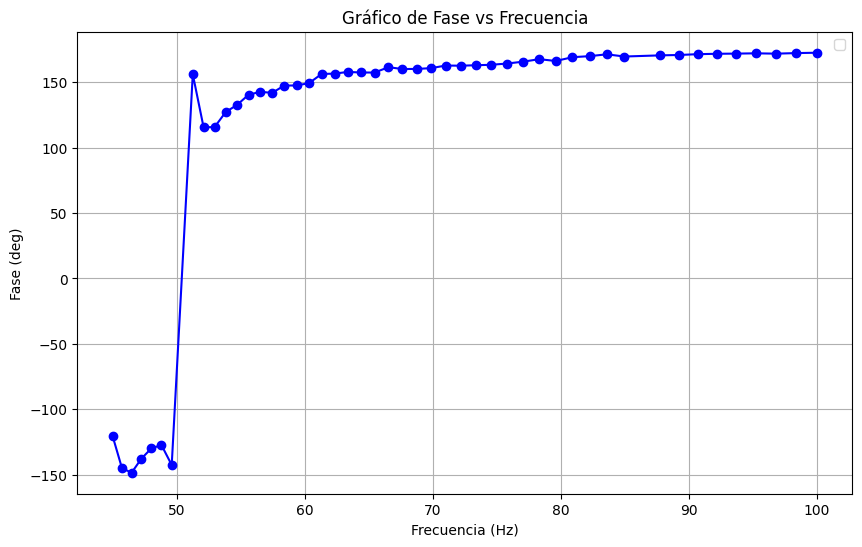

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
file_path = '/home/nicolas/Downloads/MARTINFASE.csv'

# Leer el archivo CSV, omitiendo las primeras 56 filas
df = pd.read_csv(file_path, skiprows=56)

# Asegurarse de que los nombres de las columnas son correctos
df.columns = ['X (Hz)', 'Ch-1 (deg)']

# Convertir las columnas a los tipos de datos correctos si es necesario
df['X (Hz)'] = pd.to_numeric(df['X (Hz)'], errors='coerce')
df['Ch-1 (deg)'] = pd.to_numeric(df['Ch-1 (deg)'], errors='coerce')

# Eliminar filas con valores NaN si los hay
df = df.dropna()

# Invertir los signos de la columna de fase
df['Ch-1 (deg)'] = -df['Ch-1 (deg)']

# Dividir los datos en dos partes
df_before_50hz = df[df['X (Hz)'] < 50]
df_after_50hz = df[df['X (Hz)'] >= 50]

# Eliminar filas con fase negativa en la parte después de 50 Hz
df_after_50hz_filtered = df_after_50hz[df_after_50hz['Ch-1 (deg)'] >= 0]

# Combinar las dos partes de los datos
df_combined = pd.concat([df_before_50hz, df_after_50hz_filtered])

# Comprobar si hay datos para graficar
if df_combined.empty:
    print("No hay datos para graficar.")
else:
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.legend('Figura 12. Grafico de Fase con el analizador de audio')
    plt.plot(df_combined['X (Hz)'], df_combined['Ch-1 (deg)'], marker='o', linestyle='-', color='b')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Fase (deg)')
    plt.title('Gráfico de Fase vs Frecuencia')
    plt.grid(True)
    plt.show()



Podemos ver que ocurrio una mala medición en la fase, ya que faltaron puntos antes de los 50Hz y la fase no termina bajando a los 0 grados 


## 6) Diseño de la placa 

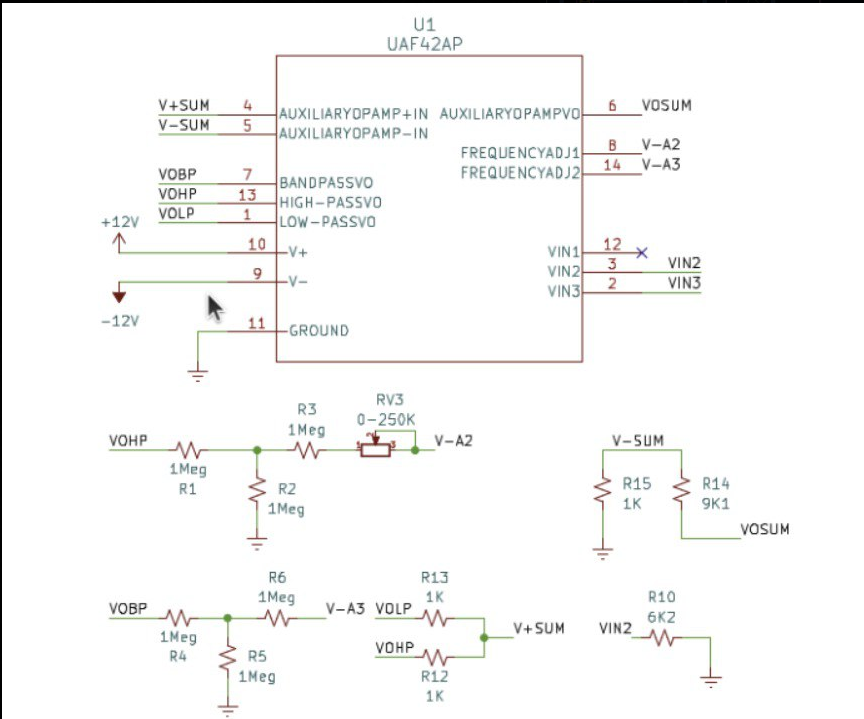

Figura 13. Esquematico 

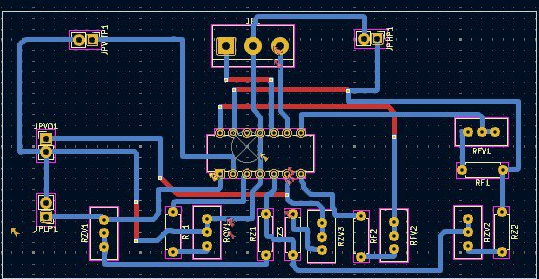

Figura 14. Diseño en PCB

## 7) Conclusiones:

* Diseño: Fue una buena practica de laboratorio la cual nos sirvio mucho para fijar los conocimientos adquiridos y plasmarlo en la realidad. 

* Armado: De mi parte es la primera placa que armo ya que vengo de un colegio no técnico en la que pude aprender mucho tanto del diseño en pcb como en el posterior armadao

* Resultados obtenidos: Con las mediciones pudimos obtener resultados como los que esperabamos tanto en modulo y fase con el osciloscopio. Por el lado del analizador de audio pudimos obtener un muy buen resultado con el modulo pero no asi con la fase ya que tal vez faltaron puntos antes de los 50Hz.